In [2]:
# Импорт необходимых пакетов
import gymnasium as gym
from stable_baselines3 import DQN

In [3]:
!pip install swig
!pip install gymnasium[box2d]
!pip install stable-baselines3
!pip install PyVirtualDisplay
!sudo apt-get install xvfb

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2373076 sha256=b5b4f38adcde654cd33a08ab99d1777a8864bd381082b5445cb86857f972c1ff
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 24 not upgraded.
Need to get 7

In [4]:
# Создание среды LunarLander
ENV_NAME = "LunarLander-v2"
env = gym.make(ENV_NAME)

In [5]:
model = DQN("MlpPolicy", env, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [6]:
# Обучение модели
timestamp=3000000
model.learn(total_timesteps=timestamp, log_interval=30)
model.save("model_1")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 92.5     |
|    ep_rew_mean      | -173     |
|    exploration_rate | 0.991    |
| time/               |          |
|    episodes         | 30       |
|    fps              | 4755     |
|    time_elapsed     | 0        |
|    total_timesteps  | 2776     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 92.7     |
|    ep_rew_mean      | -174     |
|    exploration_rate | 0.982    |
| time/               |          |
|    episodes         | 60       |
|    fps              | 4811     |
|    time_elapsed     | 1        |
|    total_timesteps  | 5563     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.6     |
|    ep_rew_mean      | -178     |
|    exploration_rate | 0.973    |
| time/               |          |
|    episodes       

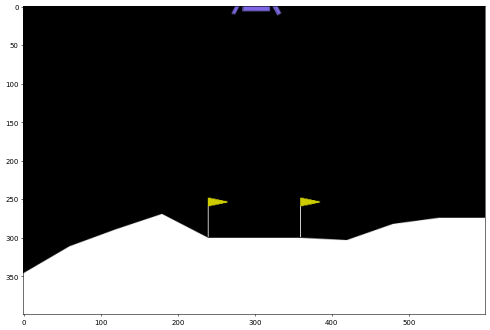

In [7]:
from IPython import display
from pyvirtualdisplay import Display
import matplotlib.pyplot as plt
from matplotlib import animation


d = Display()
d.start()

env = gym.make('LunarLander-v2', render_mode="rgb_array")

obs, info = env.reset()

img = []
for _ in range(300):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)

    display.clear_output(wait=True)
    img.append(env.render())
    # if d:
        # env.reset()

dpi = 50
interval = 50 # ms

plt.figure(figsize=(img[0].shape[1]/dpi,img[0].shape[0]/dpi),dpi=dpi)
patch = plt.imshow(img[0])
plt.axis=('off')
animate = lambda i: patch.set_data(img[i])
ani = animation.FuncAnimation(plt.gcf(),animate,frames=len(img),interval=interval)
display.display(display.HTML(ani.to_jshtml()))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
